# 1. 线性回归

## 1.1 单变量线性回归
### 单变量线性回归公式
$$h_{w,b}(x)=b+wx$$
$w$和$b$是参数，为了方便运算，可以给$x$加上一个$x_0$
$$h_{w,b}(x)=bx_{0}+wx_{1}$$
### 损失函数
$$J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}(h_{w,b}(x^{(i)})-y^{(i)})^{2}$$
为了避免不恰当的数据范围带来损失过大或过小，在评估损失的时候，可以对$h_{w,b}(x^{(i)})$和$y^{(i)}$先进行标准化，使得损失数值在可评估的范围内。
**在进行梯度下降时，不进行此操作**
### 优化算法——梯度下降
$$w_j=w_{j}-\alpha\frac{\partial}{\partial{w_j}}{J(w,b)}=w_{j}-\alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{w,b}(x^{(i)})-y^{(i)})x^{(i)}}$$
$$b_j=b_{j}-\alpha\frac{\partial}{\partial{b_j}}{J(w,b)}=w_{j}-\alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{w,b}(x^{(i)})-y^{(i)})}$$

### python代码

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from utils import compute_loss

读取数据集

In [2]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
data

查看数据集

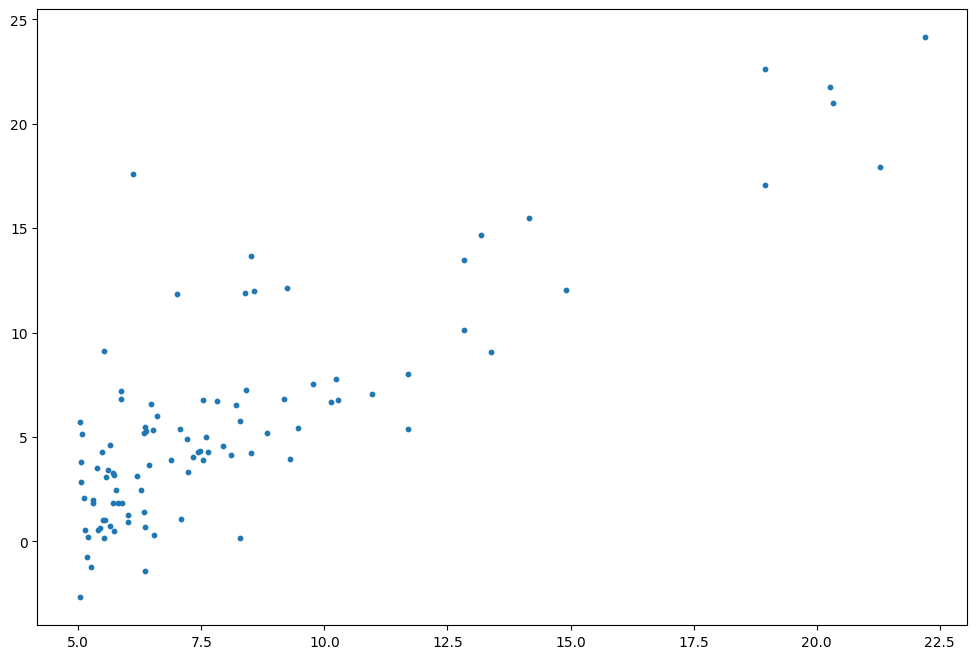

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=data[:, 0], y=data[:, 1], s=10)
plt.show()

分割训练集和验证集

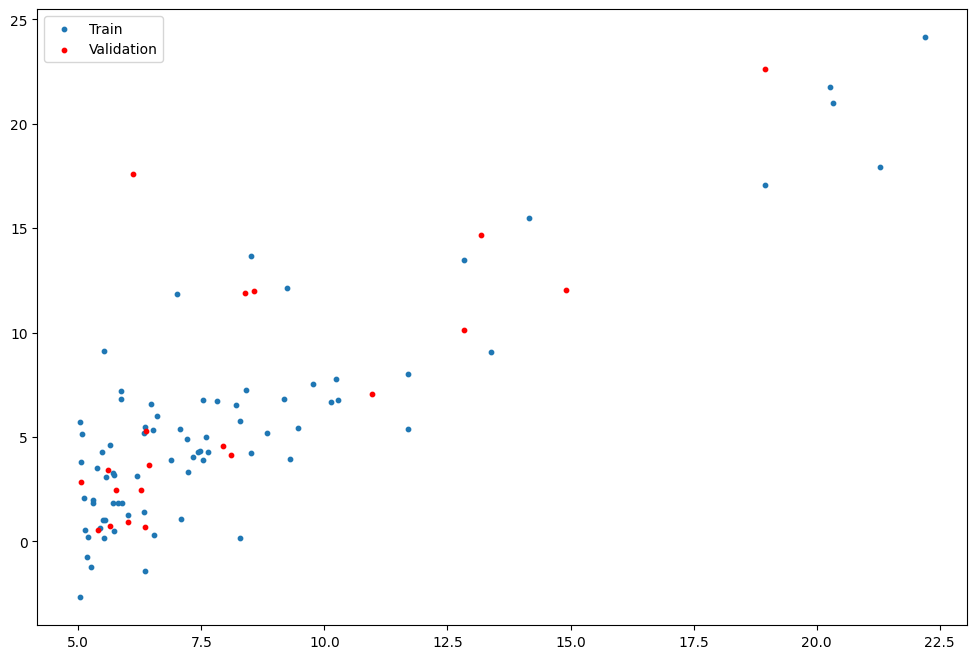

In [4]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data[:, 0], data[:, 1], test_size=0.2)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train_x, y=train_y, s=10, label="Train")
ax.scatter(x=val_x, y=val_y, s=10, color="red", label="Validation")
ax.legend()
plt.show()

扩展维度，从长度为$n$的向量变成$n\times 1$的矩阵

In [5]:
train_x_ex = np.expand_dims(train_x,axis=1)
train_y_ex = np.expand_dims(train_y,axis=1)
val_x_ex = np.expand_dims(val_x,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)

train_x_ex.std(axis=0)

array([3.88580283])

调入线性回归类，获得参数矩阵和训练损失序列，记录训练时间

**运行速度：**
原版本：循环计算每一个参数，进行更新
```
error = pred - y
repeat{
    theta[0,i]=theta[0,i] - ((alpha / len(X)) * np.sum(np.multiply(error, x[:,i])))
}
```
改进后：使用numpy的矩阵运算，直接计算出$(d+1) \times (d+1)$的梯度矩阵，取对角线元素就是每个参数的梯度
```
error shape: (d+1, n)
error_1, error_2, ···, error_n
...
...
error_1, error_2, ···, error_n


theta = theta -  ((alpha / len(X)) * np.matmul(error, x).diagonal().T
```

In [6]:
from utils import LinearRegression

epochs = 1000
alpha = 0.01
linear_reg = LinearRegression(x=train_x_ex,y=train_y_ex,lr=alpha,epoch=epochs)
start_time = time.time()
theta,loss = linear_reg.train()
end_time = time.time()

theta

Epoch: 1/1000, Train Loss: 0.5000
Epoch: 2/1000, Train Loss: 0.4925
Epoch: 3/1000, Train Loss: 0.4852
Epoch: 4/1000, Train Loss: 0.4781
Epoch: 5/1000, Train Loss: 0.4711
Epoch: 6/1000, Train Loss: 0.4642
Epoch: 7/1000, Train Loss: 0.4574
Epoch: 8/1000, Train Loss: 0.4508
Epoch: 9/1000, Train Loss: 0.4443
Epoch: 10/1000, Train Loss: 0.4380
Epoch: 11/1000, Train Loss: 0.4318
Epoch: 12/1000, Train Loss: 0.4257
Epoch: 13/1000, Train Loss: 0.4197
Epoch: 14/1000, Train Loss: 0.4138
Epoch: 15/1000, Train Loss: 0.4081
Epoch: 16/1000, Train Loss: 0.4025
Epoch: 17/1000, Train Loss: 0.3970
Epoch: 18/1000, Train Loss: 0.3916
Epoch: 19/1000, Train Loss: 0.3863
Epoch: 20/1000, Train Loss: 0.3811
Epoch: 21/1000, Train Loss: 0.3760
Epoch: 22/1000, Train Loss: 0.3710
Epoch: 23/1000, Train Loss: 0.3661
Epoch: 24/1000, Train Loss: 0.3613
Epoch: 25/1000, Train Loss: 0.3566
Epoch: 26/1000, Train Loss: 0.3520
Epoch: 27/1000, Train Loss: 0.3475
Epoch: 28/1000, Train Loss: 0.3431
Epoch: 29/1000, Train Loss: 0

array([[-3.91849376,  1.16989268]])

查看训练时间

In [7]:
print("Train Time: {:.4f}s".format(end_time-start_time))

Train Time: 0.0678s


计算在验证集上的损失

In [8]:
pred_val = linear_reg.predict(val_x_ex)
loss_val = compute_loss(pred_val, val_y_ex)
print("Val Loss: {:.4f}".format(loss_val))

Val Loss: 0.9942


使用sklearn库函数进行验证

In [9]:
from sklearn.linear_model import LinearRegression
sklearn_lr = LinearRegression()
sk_start_time = time.time()
sklearn_lr.fit(train_x_ex,train_y_ex)
sk_end_time = time.time()

sk_theta = [sklearn_lr.intercept_[0],sklearn_lr.coef_[0, 0]]
sk_lr_pred = sklearn_lr.predict(val_x_ex)
# sk_loss_val_arr = square_loss(sk_lr_pred, val_y_ex)
# sk_loss_val = np.sum(sk_loss_val_arr)/(2 * val_y_ex.shape[0])
sk_loss_val = compute_loss(sk_lr_pred, val_y_ex)
print("Sklearn Val Loss: {:.4f}".format(sk_loss_val))
print("Sklearn Parameters: ", sklearn_lr.intercept_, sklearn_lr.coef_)
print("Sklearn Train Time: {:.4f}s".format(sk_end_time-sk_start_time))

Sklearn Val Loss: 0.9942
Sklearn Parameters:  [-3.9189022] [[1.16994319]]
Sklearn Train Time: 0.0000s


画出预测的直线

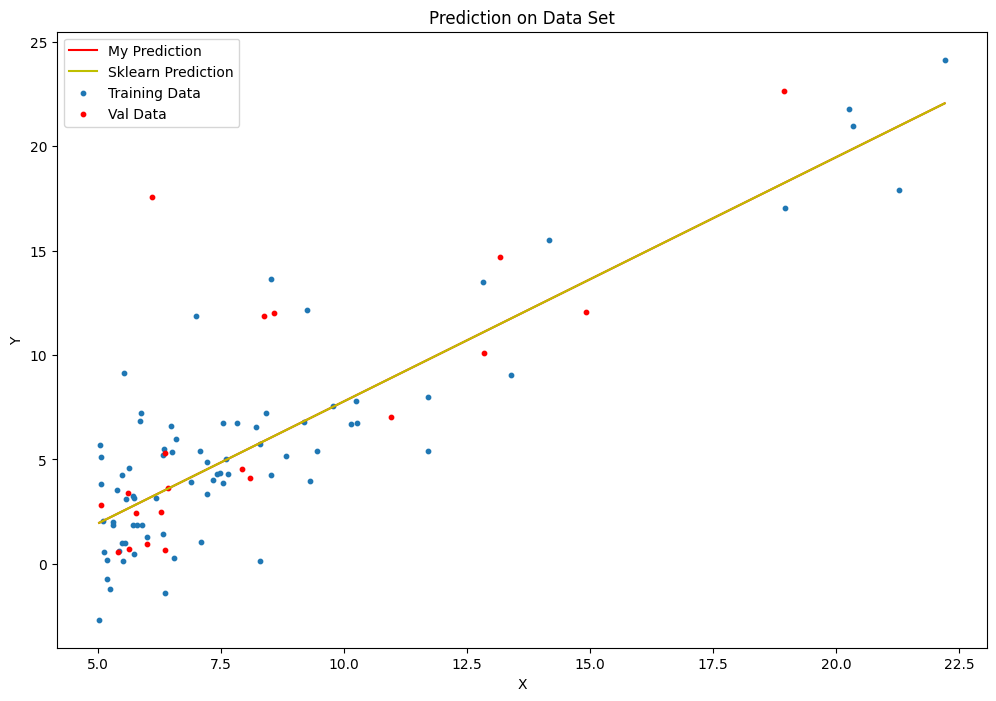

In [10]:
x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
f = theta[0, 0] + (theta[0, 1] * x)
f1 = sk_theta[0] + (sk_theta[1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='My Prediction')
ax.plot(x, f1, 'y', label='Sklearn Prediction')
ax.scatter(train_x, train_y, label='Training Data', s=10)
ax.scatter(val_x, val_y, label='Val Data', color="red", s=10)
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Prediction on Data Set')
plt.show()

画出训练损失曲线

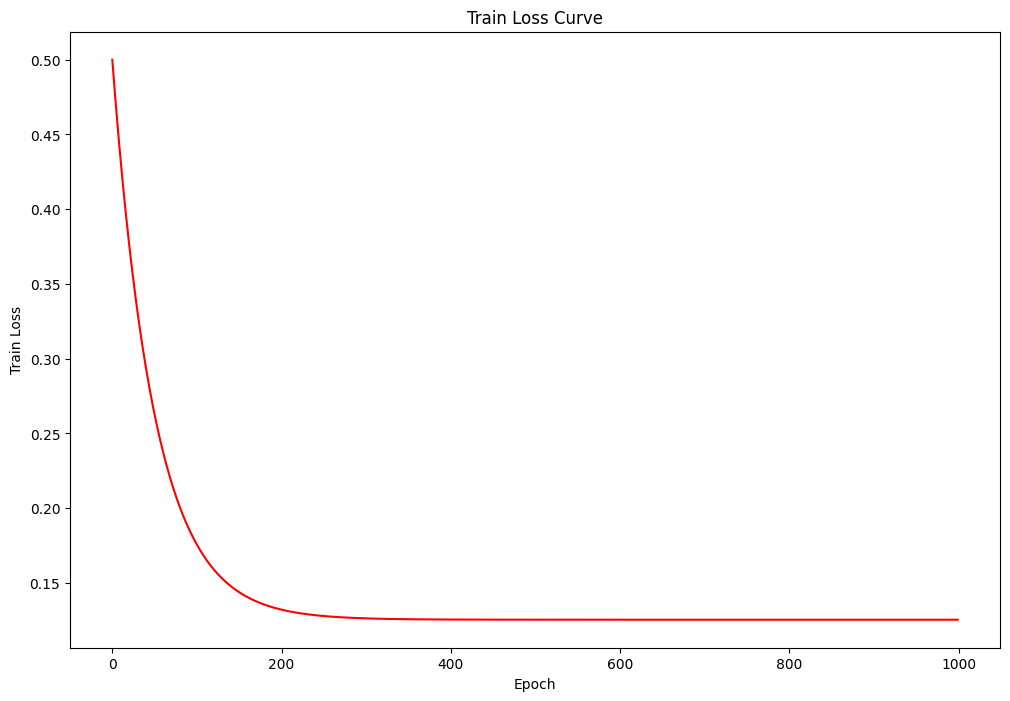

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epochs), loss, 'r')
ax.set_xlabel('Epoch')
ax.set_ylabel('Train Loss')
ax.set_title('Train Loss Curve')
plt.show()

## 多变量线性回归
### 数据标准化
对数据进行标准化，能使得参数在合理的范围内，能更好地收敛，若不进行标准化，则会出现下图所示的情况
![](../imgs/standered.png)

加载数据集

In [12]:
data2 = np.loadtxt('ex1data2.txt', delimiter=',')
data2

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

数据可视化

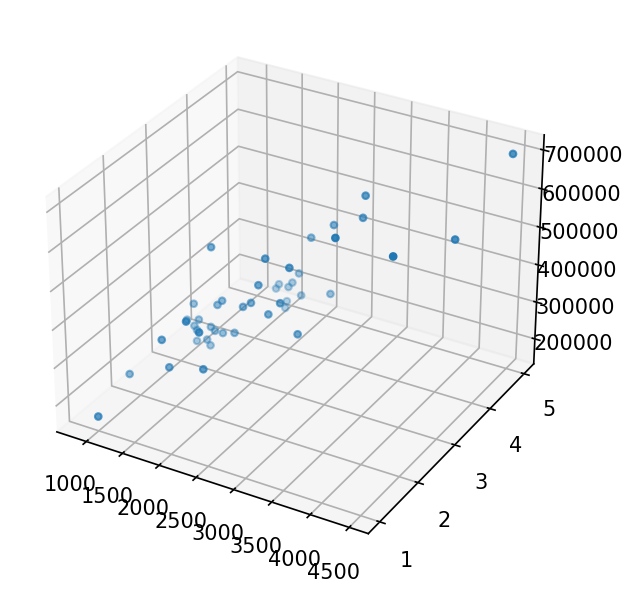

In [13]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(data2[:,0],data2[:,1],data2[:,2],s=10)
plt.show()

划分训练集、验证集

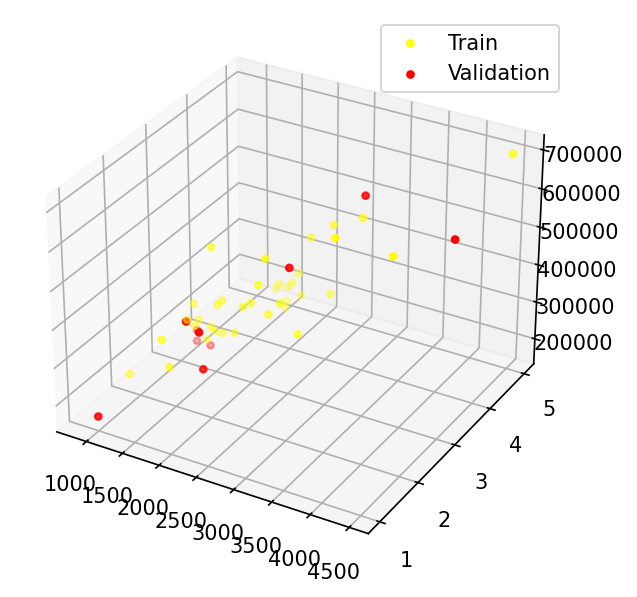

In [14]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data2[:, :2], data2[:, 2], test_size=0.2)
plt.figure(dpi=150)
ax = plt.axes(projection="3d")
ax.scatter3D(train_x[:,0], train_x[:,1],train_y, s=10, color="yellow", label="Train")
ax.scatter3D(val_x[:,0], val_x[:,1], val_y, s=10, color="red", label="Validation")
ax.legend()
plt.show()

扩展y的维度 (n)->(n,1)

In [15]:
train_y_ex = np.expand_dims(train_y,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)

调用模型，训练，记录训练时间

In [16]:
from utils import LinearRegression

alpha = 0.01
epochs = 1000
multi_lr = LinearRegression(train_x,train_y_ex,epoch=epochs,lr=alpha)
start_time = time.time()
theta, loss = multi_lr.train()
end_time = time.time()
theta

Epoch: 1/1000, Train Loss: 0.5000
Epoch: 2/1000, Train Loss: 0.4916
Epoch: 3/1000, Train Loss: 0.4834
Epoch: 4/1000, Train Loss: 0.4754
Epoch: 5/1000, Train Loss: 0.4677
Epoch: 6/1000, Train Loss: 0.4601
Epoch: 7/1000, Train Loss: 0.4528
Epoch: 8/1000, Train Loss: 0.4457
Epoch: 9/1000, Train Loss: 0.4388
Epoch: 10/1000, Train Loss: 0.4321
Epoch: 11/1000, Train Loss: 0.4255
Epoch: 12/1000, Train Loss: 0.4192
Epoch: 13/1000, Train Loss: 0.4130
Epoch: 14/1000, Train Loss: 0.4070
Epoch: 15/1000, Train Loss: 0.4011
Epoch: 16/1000, Train Loss: 0.3954
Epoch: 17/1000, Train Loss: 0.3899
Epoch: 18/1000, Train Loss: 0.3845
Epoch: 19/1000, Train Loss: 0.3793
Epoch: 20/1000, Train Loss: 0.3742
Epoch: 21/1000, Train Loss: 0.3692
Epoch: 22/1000, Train Loss: 0.3644
Epoch: 23/1000, Train Loss: 0.3597
Epoch: 24/1000, Train Loss: 0.3551
Epoch: 25/1000, Train Loss: 0.3506
Epoch: 26/1000, Train Loss: 0.3463
Epoch: 27/1000, Train Loss: 0.3421
Epoch: 28/1000, Train Loss: 0.3380
Epoch: 29/1000, Train Loss: 0

array([[119924.61231716,    140.97705524, -18480.03688938]])

查看训练时间

In [17]:
print("Train Time: {:.4f}s".format(end_time-start_time))

Train Time: 0.0449s


查看验证集损失

In [18]:
from utils import compute_loss
pred = multi_lr.predict(val_x)
multi_loss = compute_loss(pred,val_y_ex)
print("Val Loss: {:.4f}".format(multi_loss))

Val Loss: 3.1577


查看库函数的训练时间、损失和参数

In [19]:
from sklearn.linear_model import LinearRegression
sk_multi_lr = LinearRegression()
sk_start_time = time.time()
sk_multi_lr.fit(train_x,train_y_ex)
sk_end_time = time.time()

sk_lr_pred = sk_multi_lr.predict(val_x)
sk_loss = compute_loss(sk_lr_pred,val_y_ex)
sk_theta = np.array([[sk_multi_lr.intercept_[0],sk_multi_lr.coef_[0,0],sk_multi_lr.coef_[0,1]]])
print("Sklearn Train Time: {:.4f}s".format(sk_end_time-sk_start_time))
print("Sklearn Val Loss: {:.4f}".format(sk_loss))
print("Sklearn parameters: ", sk_multi_lr.intercept_, sk_multi_lr.coef_)

Sklearn Train Time: 0.0010s
Sklearn Val Loss: 3.1577
Sklearn parameters:  [121392.39417445] [[   141.8235533  -19438.40451903]]


结果可视化

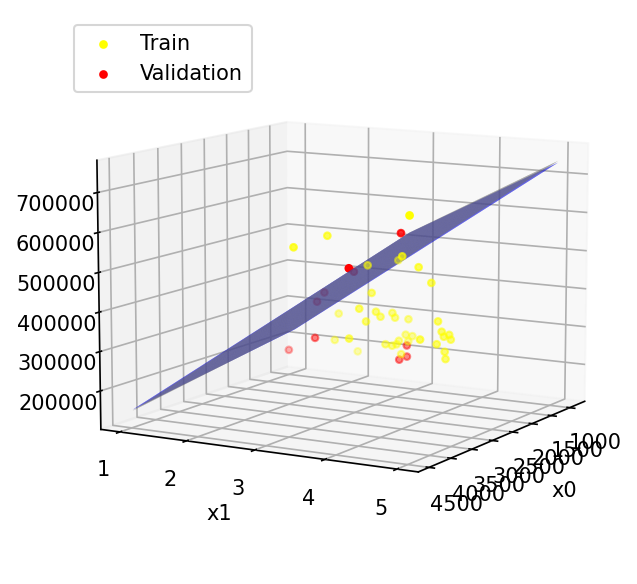

In [20]:
plt.figure(dpi=150)
ax = plt.axes(projection="3d")
x = np.linspace(data2[:,0].min(), data2[:,0].max(), num=100)
y = np.linspace(data2[:,1].min(), data2[:,1].max(), num=100)

xx, yy = np.meshgrid(x, y)

z1 = np.zeros((100, 100))
z2 = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        z1[i,j] = theta[0,0] + theta[0,1] * x[i] + theta[0,2] * y[j]
        z2[i,j] = sk_theta[0,0] + sk_theta[0,1] * x[i] + sk_theta[0,2] * y[j]

ax.plot_surface(xx,yy,z1,alpha=0.8, rstride=3, cstride=1, color="blue")
ax.plot_surface(xx,yy,z2,alpha=0.8, rstride=3, cstride=1, color="gray")
ax.scatter3D(train_x[:,0], train_x[:,1],train_y, s=10, color="yellow", label="Train")
ax.scatter3D(val_x[:,0], val_x[:,1], val_y, s=10, color="red", label="Validation")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.view_init(elev=10, azim=30)
plt.legend(loc=2)
plt.show()

训练过程可视化

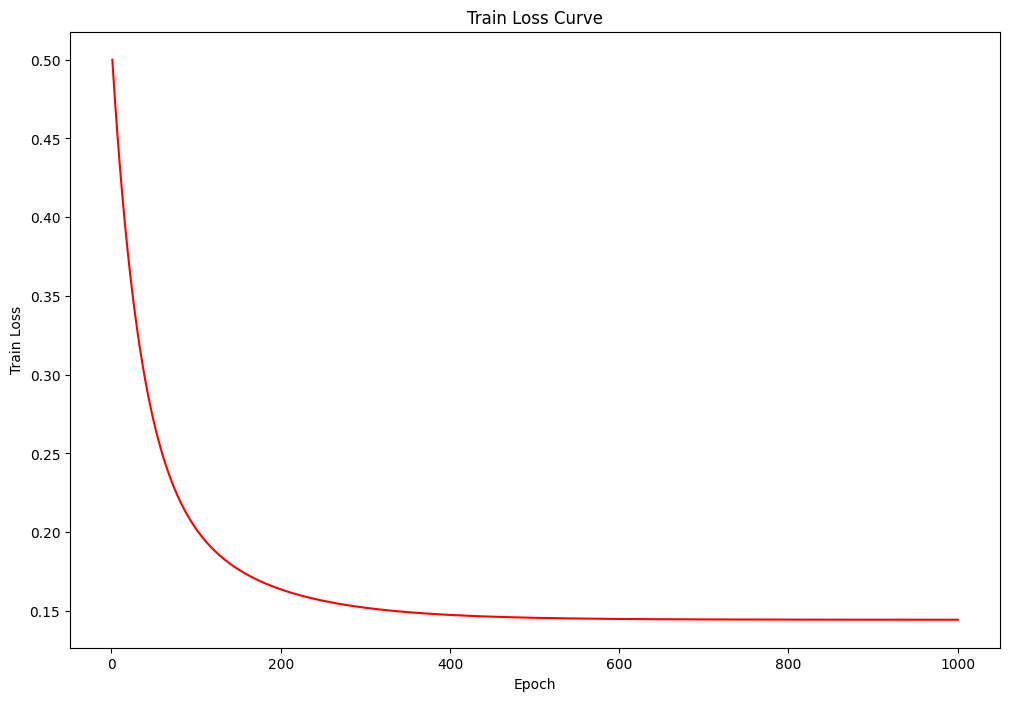

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1,epochs+1), loss, 'r')
ax.set_xlabel('Epoch')
ax.set_ylabel('Train Loss')
ax.set_title('Train Loss Curve')
plt.show()